
# **Artificial Intelligence  FEUP**
## **2nd Assignment - Supervised Learning**
### **3rd Year - 2nd Semester - 2024/2025**

## Problem Definition

The goal of this assignment is to develop a supervised machine learning pipeline capable of predicting whether an individual is a **smoker** or **non-smoker** based on clinical and physical health attributes. This is formulated as a **binary classification problem**, where the target variable is:

- `smoking`:  
  - `0` - identifies a non-smoker  
  - `1` - identifies a smoker

##  Datasets

Two datasets were provided:

- `train.csv`: contains labeled data used for training and evaluation  
- `test.csv`: contains unseen data used for final predictions (no target labels provided)

Both datasets include a wide range of features related to biometric, clinical, and lifestyle indicators for each individual.

### Example Features:
- Demographic: `age`, `height(cm)`, `weight(kg)`
- Clinical: `systolic`, `relaxation`, `Cholesterol`, `triglyceride`, `HDL`, `LDL`, `hemoglobin`
- Functional: `eyesight(left/right)`, `hearing(left/right)`
- Health Indicators: `waist(cm)`, `fasting blood sugar`, `serum creatinine`, `AST`, `ALT`, `Gtp`, `dental caries`

These features were explored, cleaned, and used to train and evaluate different classification algorithms, aiming to identify the most effective model for smoking prediction.

# Import Libraries and Set Options

Import necessary libraries for data handling, visualization, and machine learning.  
Set pandas display options and seaborn plot style for better readability.

- **pandas** for loading CSV files and handling structured data efficiently.
- **NumPy** for fast numerical operations and array manipulations.
- **matplotlib** and **seaborn** to visualize data and uncover patterns through charts and plots.
- **scikit-learn** for machine learning tasks like splitting datasets, scaling features, training models, and measuring their performance with built-in metrics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import VarianceThreshold, f_classif
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
import time
import math


sns.set_theme(style="whitegrid")
pd.set_option('display.max_columns', None)

# Load and Preview Dataset

Load the dataset from a CSV file (`train.csv`) and take a quick look at the first few rows.  
Also, check the shape, data types, and basic statistics of the dataset.

In [2]:
df = pd.read_csv('./original/train.csv')
df.head()  # Preview dataset

print(f"Dataset shape: {df.shape}")
df.info()
df.describe()

Dataset shape: (157975, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157975 entries, 0 to 157974
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   157975 non-null  int64  
 1   age                  157975 non-null  int64  
 2   height(cm)           157975 non-null  int64  
 3   weight(kg)           157975 non-null  int64  
 4   waist(cm)            157975 non-null  float64
 5   eyesight(left)       157975 non-null  float64
 6   eyesight(right)      157975 non-null  float64
 7   hearing(left)        157975 non-null  int64  
 8   hearing(right)       157975 non-null  int64  
 9   systolic             157975 non-null  int64  
 10  relaxation           157975 non-null  int64  
 11  fasting blood sugar  157975 non-null  int64  
 12  Cholesterol          157975 non-null  int64  
 13  triglyceride         157975 non-null  int64  
 14  HDL                  157975 non-null  in

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,157975.000000,157975.000000,157975.000000,157975.000000,157975.000000,157975.000000,157975.000000,157975.000000,157975.000000,157975.000000,157975.000000,157975.000000,157975.000000,157975.000000,157975.000000,157975.000000,157975.000000,157975.000000,157975.000000,157975.000000,157975.000000,157975.000000,157975.000000,157975.000000
mean,79940.853901,44.290400,165.289508,67.169938,83.014987,1.005962,1.001105,1.023953,1.023402,122.512549,76.879747,98.360424,195.782750,127.722386,55.831049,114.594733,14.800475,1.074157,0.893020,25.521019,26.568698,36.272195,0.198329,0.439854
std,45877.351116,11.841709,8.813553,12.585904,8.956309,0.400907,0.390310,0.152904,0.151178,12.722988,8.991713,15.334898,28.389548,66.204408,13.955839,28.170839,1.429802,0.347627,0.179255,9.472461,17.778515,31.260761,0.398742,0.496371
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,44.000000,46.000000,77.000000,8.000000,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40158.500000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,70.000000,90.000000,175.000000,77.000000,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,80030.000000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,78.000000,96.000000,196.000000,115.000000,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,119683.500000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,103.000000,217.000000,165.000000,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,133.000000,375.000000,393.000000,766.000000,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


# Check and Handle Missing Values

Identify if there are any missing values in the dataset.  
If missing values exist, fill them with the median of the respective columns.

In [3]:
missing_total = df.isnull().sum().sum()
print(f"Valores em falta no dataset de treino: {missing_total}")

if missing_total > 0:
    print("Preencher valores em falta com a mediana.")
    df = df.fillna(df.median(numeric_only=True))
else:
    print("Nenhum valor em falta encontrado.")

Valores em falta no dataset de treino: 0
Nenhum valor em falta encontrado.


# Exploratory Data Analysis (EDA)

Visualize the distribution of the target variable (smoking).  
Plot a correlation heatmap to understand relationships between numerical features.

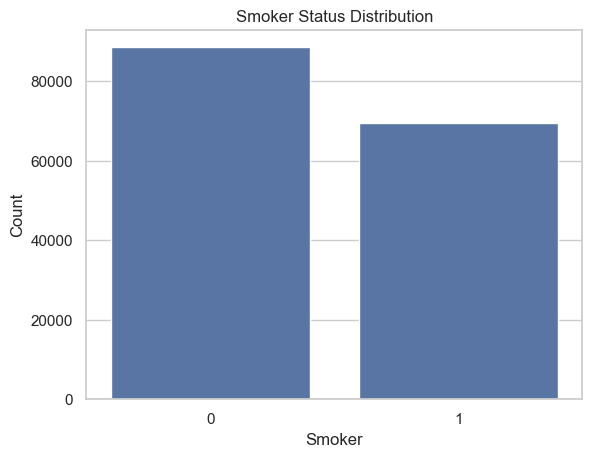

smoking
0    88489
1    69486
Name: count, dtype: int64
smoking
0    56.014559
1    43.985441
Name: proportion, dtype: float64


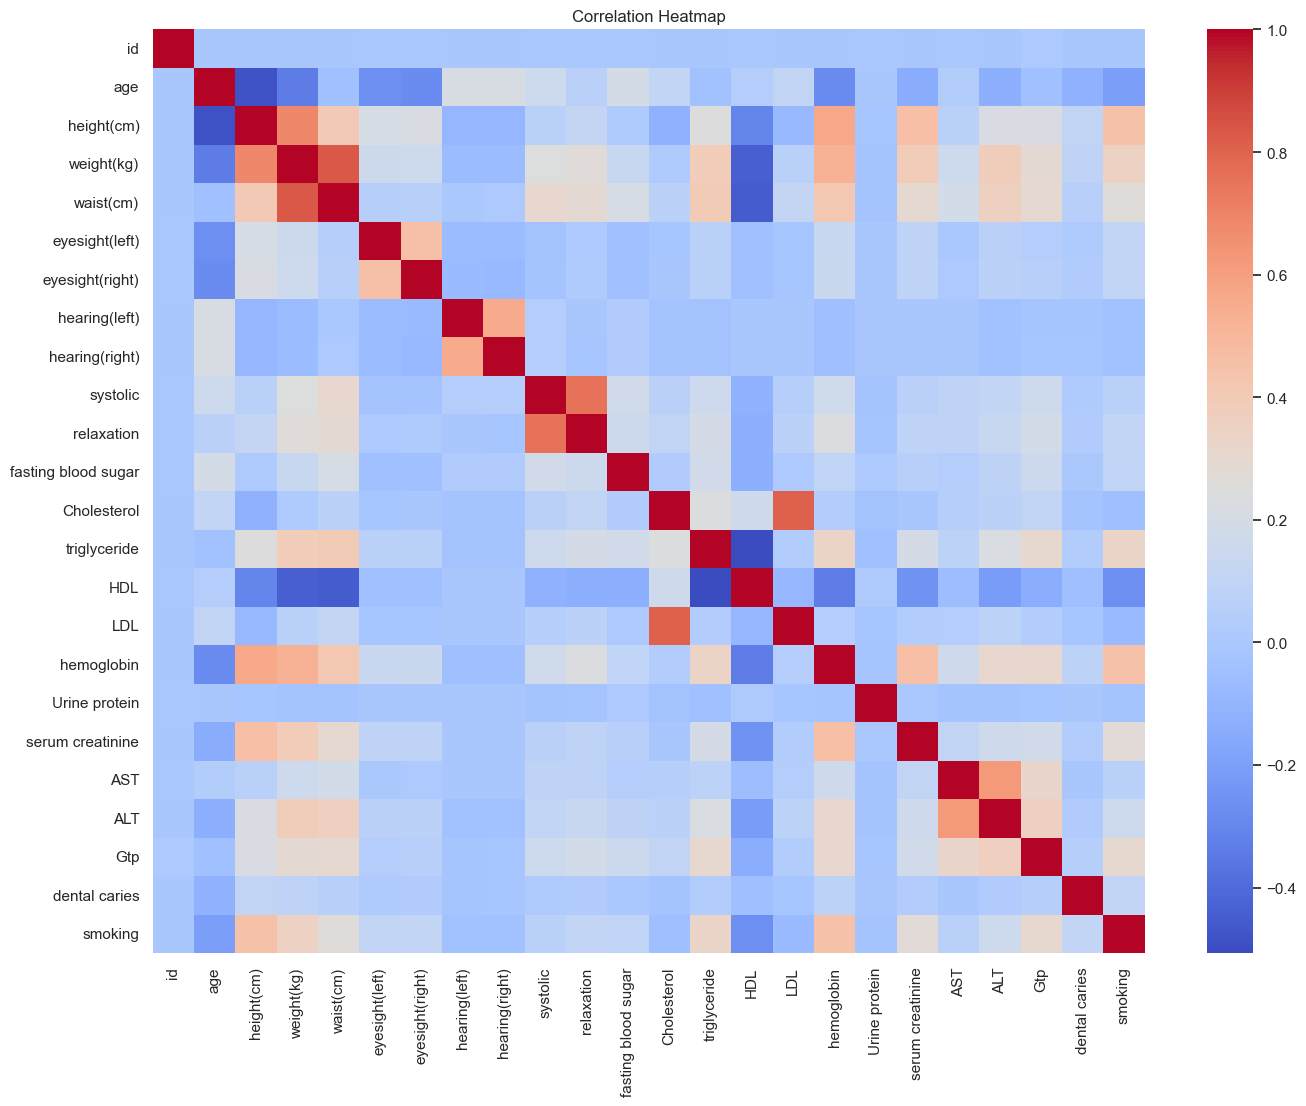

In [4]:
# Distribution of smoking variable
sns.countplot(x='smoking', data=df)
plt.title("Smoker Status Distribution")
plt.xlabel("Smoker")
plt.ylabel("Count")
plt.show()

# Show class distribution in numbers and percentages
print(df['smoking'].value_counts())
print(df['smoking'].value_counts(normalize=True) * 100)

# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Boxplots of Features by Smoking Status

Create boxplots for selected features grouped by smoking status to identify patterns or differences.

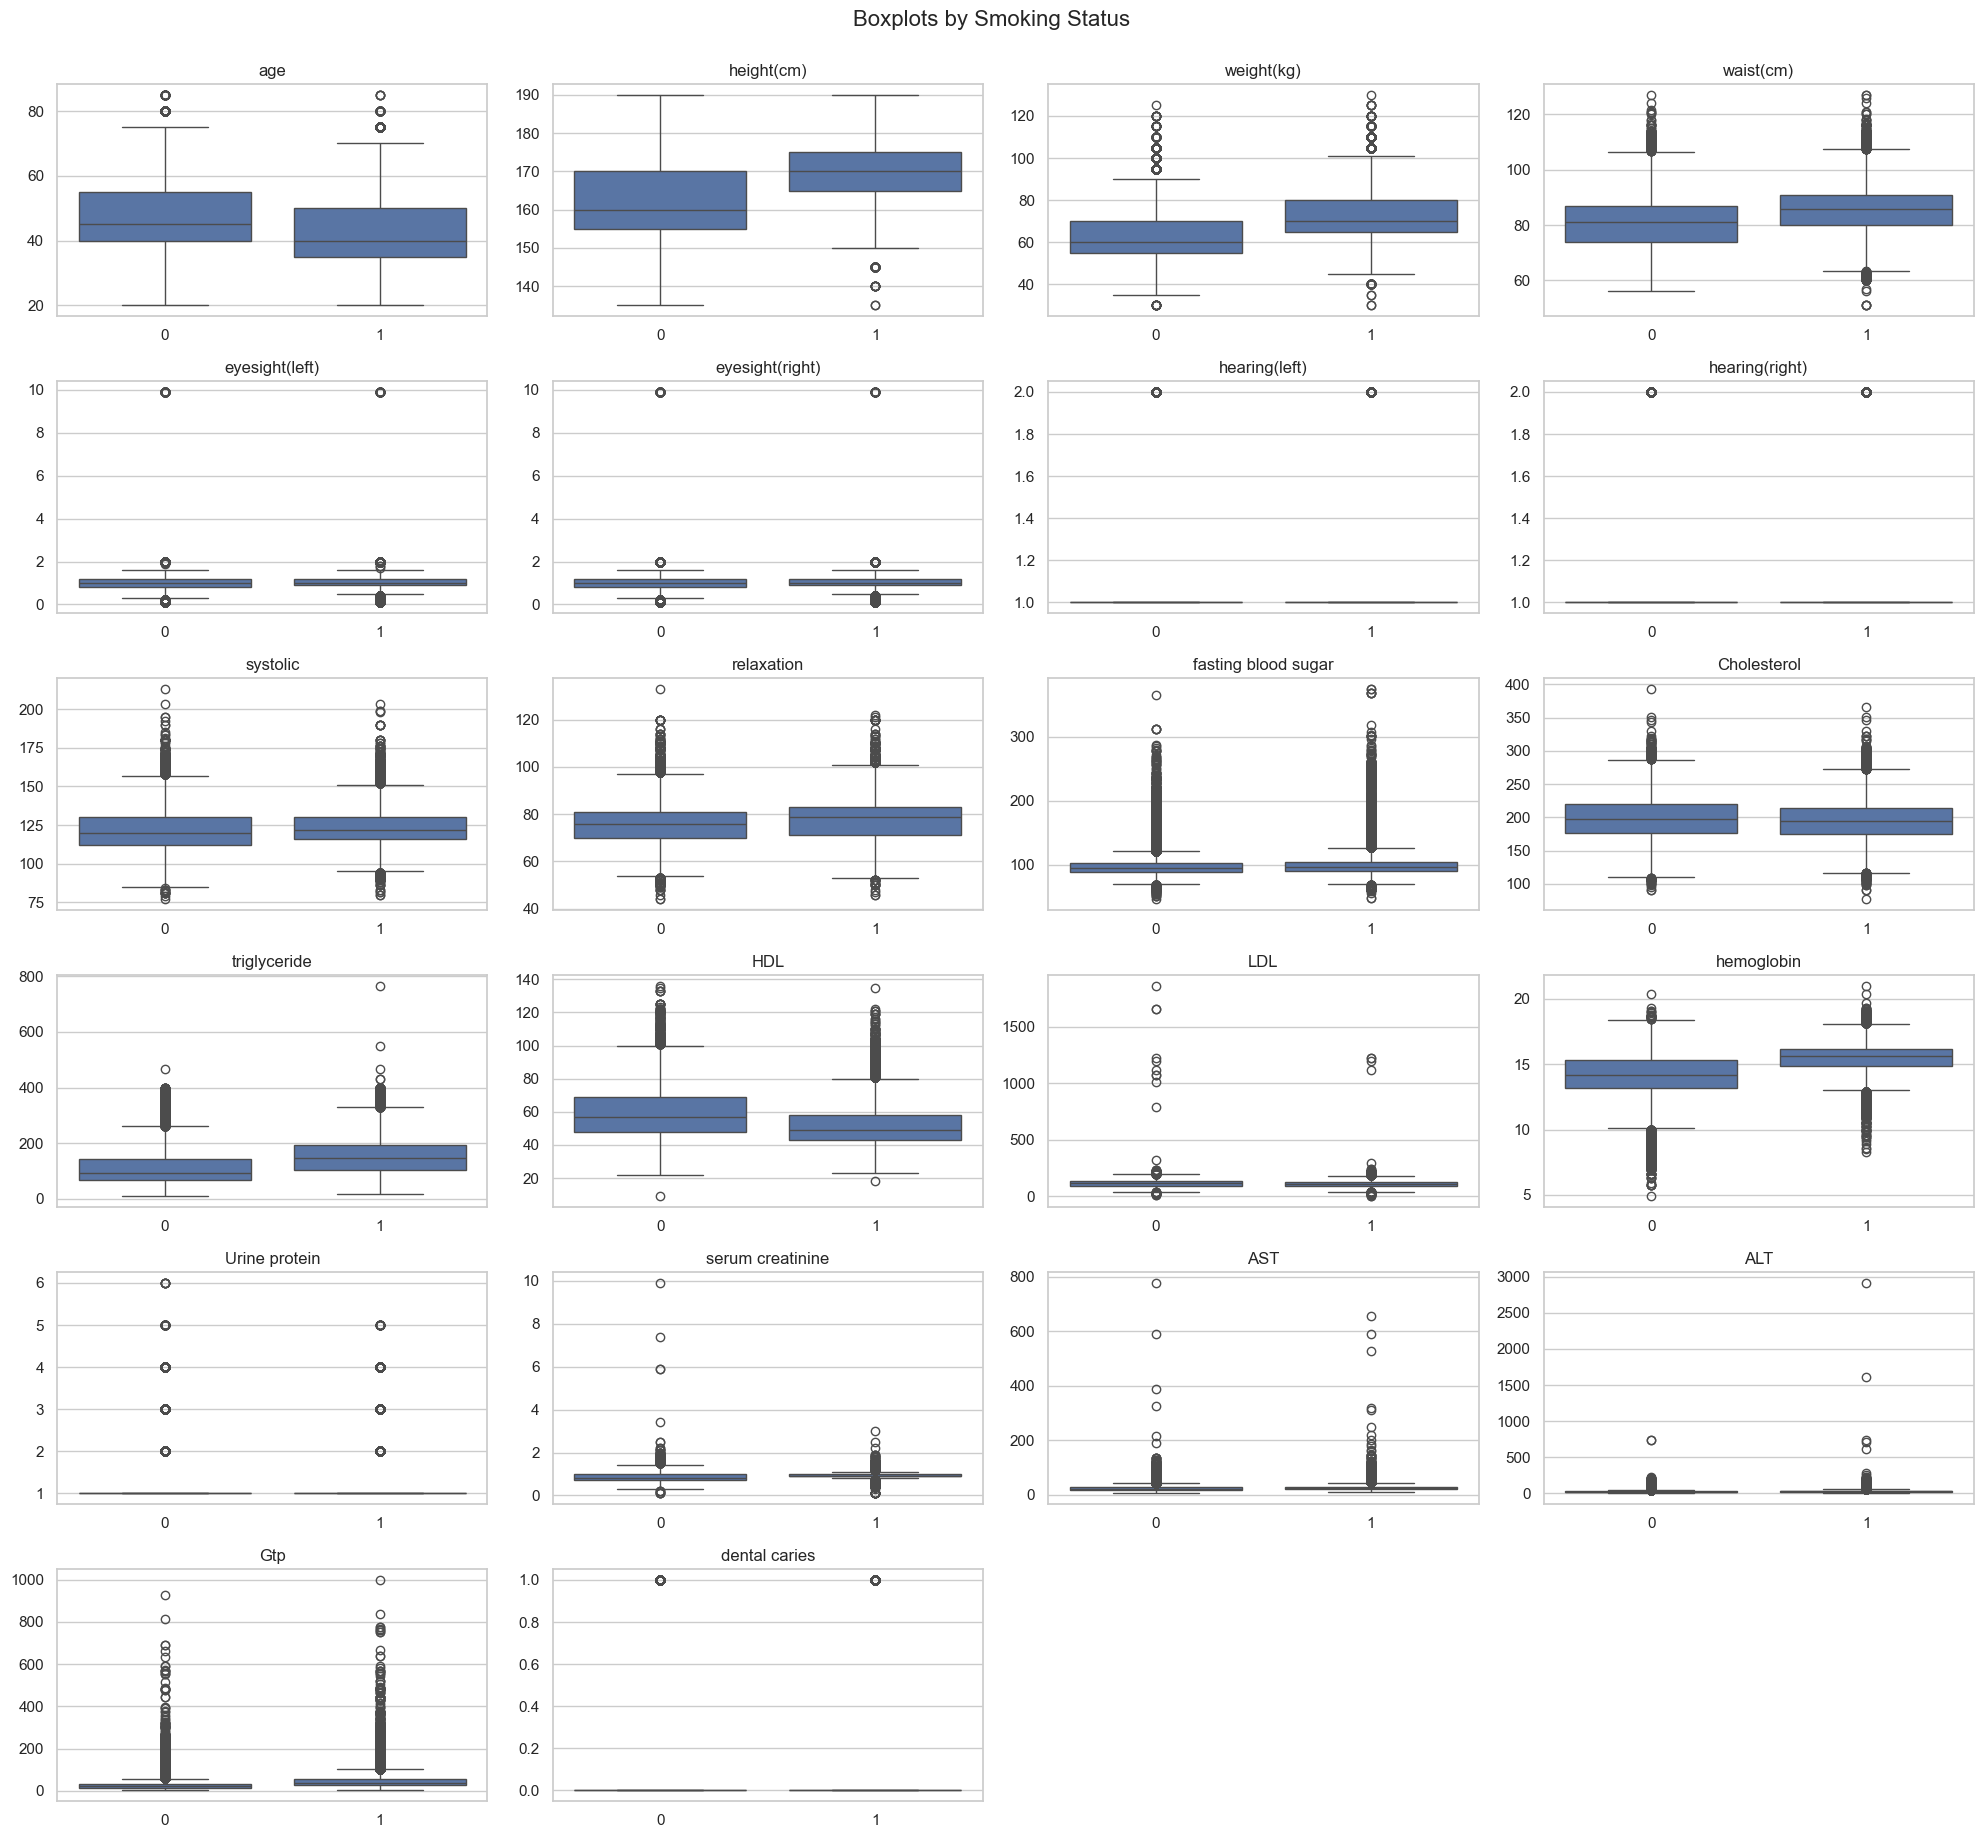

In [5]:
features = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)',
            'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar',
            'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
            'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries']

cols = 4  # 3 gráficos por linha
rows = math.ceil(len(features) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 3))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(x='smoking', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f"{feature}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Remover eixos vazios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Boxplots by Smoking Status", fontsize=16, y=1.02)
plt.show()

## Data Cleaning -> Removing Irrelevant Features

Based on the boxplots and visual inspection, some features show little to no difference between smoker and non-smoker groups.  
These features will be removed to simplify the model and avoid noise.

We drop the following irrelevant features:  
`Urine protein`, `hearing(left)`and `hearing(right)`.

In [6]:
#correlation_with_target = df.corr(numeric_only=True)['smoking'].drop('smoking')
numeric_df = df.select_dtypes(include=[np.number])
correlation_with_target = numeric_df.corr()['smoking'].drop('smoking')
correlation_sorted = correlation_with_target.abs().sort_values()
correlation_threshold = 0.05
irrelevant_features_corr = correlation_sorted[correlation_sorted < correlation_threshold].index.tolist()

selector = VarianceThreshold(threshold=0.01)
selector.fit(df.select_dtypes(include=[np.number]))
low_variance_features = df.select_dtypes(include=[np.number]).columns[~selector.get_support()].tolist()

# ANOVA F-test 
X = df.select_dtypes(include=[np.number]).drop(columns='smoking')
y = df['smoking']
f_values, p_values = f_classif(X, y)
anova_results = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': f_values,
    'p-Value': p_values
}).sort_values('p-Value')
insignificant_features = anova_results[anova_results['p-Value'] > 0.05]['Feature'].tolist()

final_irrelevant_features = list(set(irrelevant_features_corr + low_variance_features + insignificant_features))
print(f"Features consideradas irrelevantes estatisticamente ({len(final_irrelevant_features)}):\n", final_irrelevant_features)

# Ensure 'id' is NOT dropped here
if 'id' in final_irrelevant_features:
    final_irrelevant_features.remove('id')

df = df.drop(columns=final_irrelevant_features)
print("\nDataFrame atualizado com features relevantes apenas:")
print(df.columns)

Features consideradas irrelevantes estatisticamente (4):
 ['Urine protein', 'hearing(left)', 'hearing(right)', 'id']

DataFrame atualizado com features relevantes apenas:
Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'systolic', 'relaxation', 'fasting blood sugar',
       'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')


## Data Cleaning -> Removing Outliers (IQR Method)

Based on the visual inspection above, we remove outliers from selected numeric features using the Interquartile Range (IQR) method.

In [7]:
numeric_features = df.select_dtypes(include=[np.number]).columns.drop('smoking').tolist()

print("Features numéricas a processar com IQR:", numeric_features)

for feature in numeric_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    before = df.shape[0]
    df = df[(df[feature] >= Q1 - 1.5 * IQR) & (df[feature] <= Q3 + 1.5 * IQR)]
    after = df.shape[0]
    print(f"{feature}: removed {before - after} outliers")


Features numéricas a processar com IQR: ['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries']
id: removed 0 outliers
age: removed 674 outliers
height(cm): removed 434 outliers
weight(kg): removed 2259 outliers
waist(cm): removed 290 outliers
eyesight(left): removed 2212 outliers
eyesight(right): removed 1806 outliers
systolic: removed 1432 outliers
relaxation: removed 655 outliers
fasting blood sugar: removed 7366 outliers
Cholesterol: removed 292 outliers
triglyceride: removed 2494 outliers
HDL: removed 1546 outliers
LDL: removed 179 outliers
hemoglobin: removed 1311 outliers
serum creatinine: removed 4867 outliers
AST: removed 4780 outliers
ALT: removed 4499 outliers
Gtp: removed 6660 outliers
dental caries: removed 22472 outliers


# Data Cleaning -> Removing id

The `id` column is an irrelevant feature for modeling, but we need to keep it temporarily to save the row identifiers for later CSV creation. Therefore, we only drop the id column at this stage, after storing its values.

In [8]:
ids = df['id'].reset_index(drop=True)
df = df.drop(columns=['id'])

# Data Splitting
Separate the dataset into features (x) and target variable (y).

In [9]:
X = df.drop(columns=['smoking'])  # features
y = df['smoking']  # target variable

# Feature Scaling

Normalize the feature data using standardization (mean=0, std=1) to improve model performance.

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split

Split the data into training and testing sets with stratification to maintain class distribution.

In [11]:
X_train, X_test, y_train, y_test, ids_train, ids_test = train_test_split(
    X_scaled, y, ids, test_size=0.2, random_state=42, stratify=y
)

# Parameter Tuning

To improve model performance, GridSearchCV was used with 5-fold cross-validation to find the best hyperparameters for each classifier. Models like Decision Tree, Random Forest, KNN, and LinearSVC were tuned by testing different combinations of parameters such as tree depth, number of neighbors, or regularization strength. The best parameters were selected based on the F1 score.

In [12]:
dt_params = {
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='f1', n_jobs=-1)
dt_grid.fit(X_train, y_train)
print("Best Decision Tree params:", dt_grid.best_params_)
print("Best Decision Tree F1 score (CV):", dt_grid.best_score_)

rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'criterion': ['gini', 'entropy']
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='f1', n_jobs=-1)
rf_grid.fit(X_train, y_train)
print("Best Random Forest params:", rf_grid.best_params_)
print("Best Random Forest F1 score (CV):", rf_grid.best_score_)

knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='f1', n_jobs=-1)
knn_grid.fit(X_train, y_train)
print("Best KNN params:", knn_grid.best_params_)
print("Best KNN F1 score (CV):", knn_grid.best_score_)

svc_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'class_weight': [None, 'balanced']
}
svc_grid = GridSearchCV(LinearSVC(random_state=42, max_iter=5000), svc_params, cv=5, scoring='f1', n_jobs=-1)
svc_grid.fit(X_train, y_train)
print("Best LinearSVC params:", svc_grid.best_params_)
print("Best LinearSVC F1 score (CV):", svc_grid.best_score_)

Best Decision Tree params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
Best Decision Tree F1 score (CV): 0.7058433184950464
Best Random Forest params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest F1 score (CV): 0.7263748322607718
Best KNN params: {'n_neighbors': 9, 'weights': 'distance'}
Best KNN F1 score (CV): 0.6798007649298174
Best LinearSVC params: {'C': 0.001, 'class_weight': 'balanced'}
Best LinearSVC F1 score (CV): 0.7255186012645523


## Train and Evaluate Machine Learning Models

We will implement and compare four supervised learning algorithms:

- Decision Tree
- Random Forest
- k-Nearest Neighbors (k-NN)
- Support Vector Machine (SVM)

For each model, we will:

- Train on the training data
- Predict on the test data
- Evaluate performance using accuracy, precision, recall, F1-score, and confusion matrix


Training and evaluating Decision Tree...
Training and evaluating Random Forest...
Training and evaluating k-Nearest Neighbors...
Training and evaluating Linear Support Vector Machine...

Summary Table of Metrics:
                               Accuracy Precision    Recall  F1 Score  \
Decision Tree                  0.748774  0.652065   0.76455  0.703842   
Random Forest                  0.773243  0.685891  0.773482  0.727058   
k-Nearest Neighbors            0.743597  0.661079  0.704536  0.682116   
Linear Support Vector Machine  0.754768  0.643852   0.83238  0.726077   

                              Training Time (s) Testing Time (s)  
Decision Tree                          0.302995         0.003001  
Random Forest                            19.872         0.340001  
k-Nearest Neighbors                    0.003998         3.318621  
Linear Support Vector Machine          0.425002         0.002008  


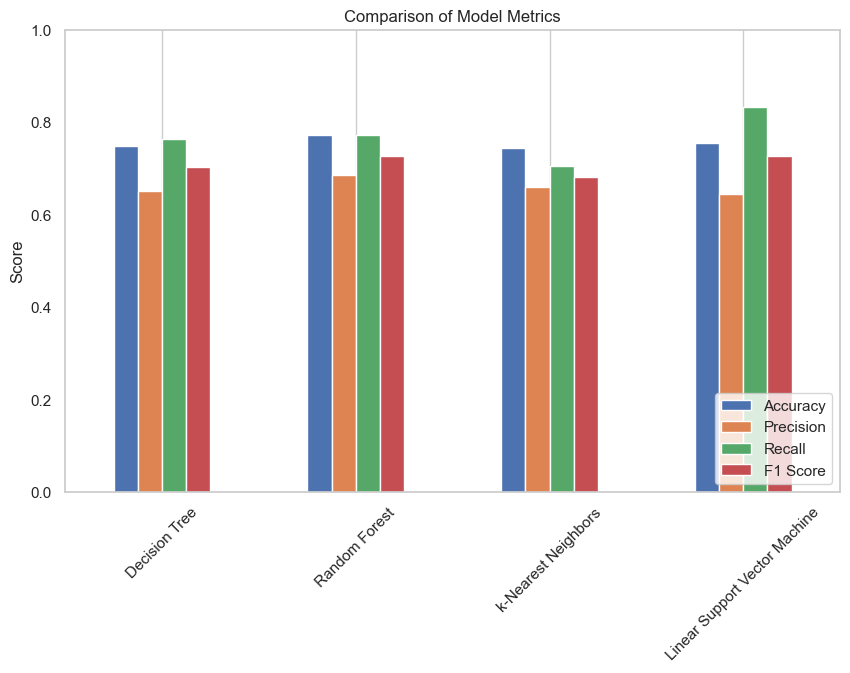

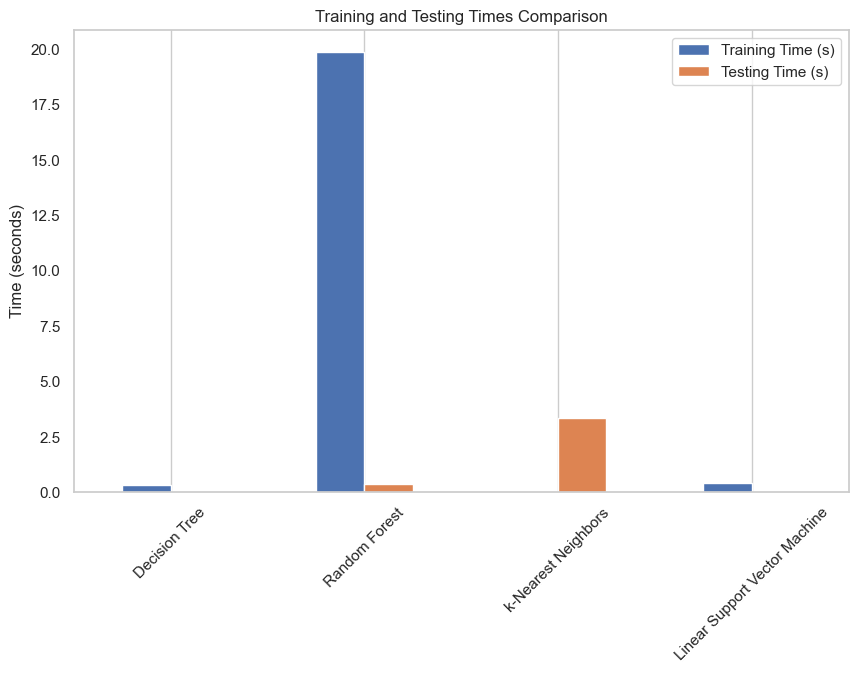

In [13]:
models = {
    'Decision Tree': dt_grid.best_estimator_,
    'Random Forest': rf_grid.best_estimator_,
    'k-Nearest Neighbors': knn_grid.best_estimator_,
    'Linear Support Vector Machine': svc_grid.best_estimator_
}

results = {}

for name, model in models.items():
    print(f"Training and evaluating {name}...")
    
    # training time
    start_train = time.time()
    model.fit(X_train, y_train)
    end_train = time.time()
    training_time = end_train - start_train

    # testing time
    start_test = time.time()
    y_pred = model.predict(X_test)
    end_test = time.time()
    testing_time = end_test - start_test

    # metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm,
        'Training Time (s)': training_time,
        'Testing Time (s)': testing_time,
        'Train Predictions': model.predict(X_train), 
        'Test Predictions': y_pred   
    }   


for name, res in results.items():
    # Train split: id, true label, predicted label
    train_df = pd.DataFrame({
        'id': ids_train.reset_index(drop=True),
        'True Label': y_train.reset_index(drop=True),
        'Predicted Label': pd.Series(res['Train Predictions']).reset_index(drop=True)
    })
    train_df.to_csv(f'original/train_predictions/{name}_train_predictions.csv', index=False)

    # Test split: id, predicted label
    test_df = pd.DataFrame({
        'id': ids_test.reset_index(drop=True),
        'Predicted Label': pd.Series(res['Test Predictions']).reset_index(drop=True)
    })
    test_df.to_csv(f'original/train_predictions/{name}_training_test_predictions.csv', index=False)

#--------
metrics_df = pd.DataFrame(results).T[
    ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Training Time (s)', 'Testing Time (s)']
]

print("\nSummary Table of Metrics:")
print(metrics_df)

#----------------
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

metrics_df[metrics_to_plot].plot(kind='bar', figsize=(10,6))
plt.title('Comparison of Model Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.show()

# time
times_df = metrics_df[['Training Time (s)', 'Testing Time (s)']].copy()

times_df.plot(kind='bar', figsize=(10,6))
plt.title('Training and Testing Times Comparison')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.grid(axis='y')
plt.show()

# Model Evaluation Comparison

## Decision Tree:
- Extremely Fast to train and test;
- Low Precision (creates many false positives);
- Useful when recall mattters more than precision.

## Random Forest:
- Best performance (highest F1 and accuracy);
- Slowest to train;
- Ideal when model quality is the top priority and training time is acceptable.

## K-Nearest Neighbors (KNN)
- Instant to train, but slow to make predictions;
- Lowest F1 score (less balanced);
- Suitable for simple use cases, but not optimal for large-scale production.

## Linear Support Vector Machine (SVM)
- Highest recall (good at detecting positives);
- Lowest precision (detects a lot of false positives);
- Extremely fast. Good when recall is critical and speed is required.

# Confusion Matrix

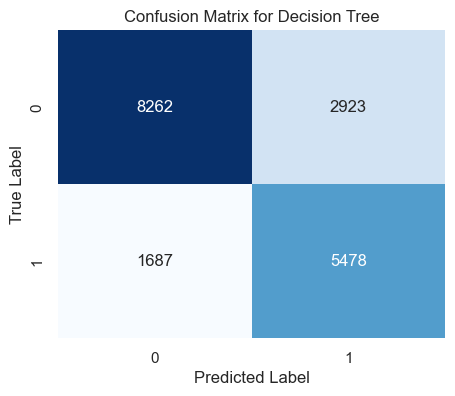

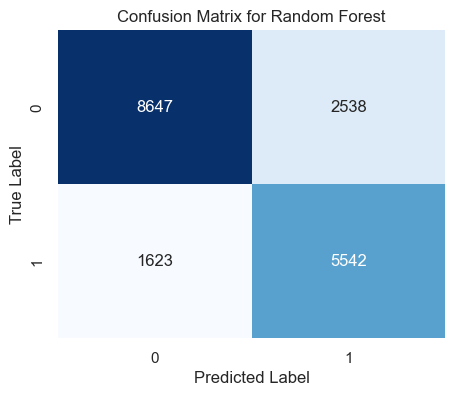

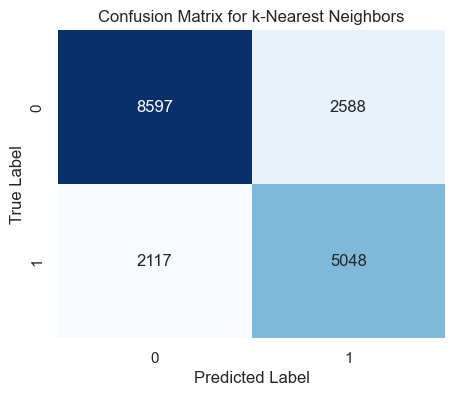

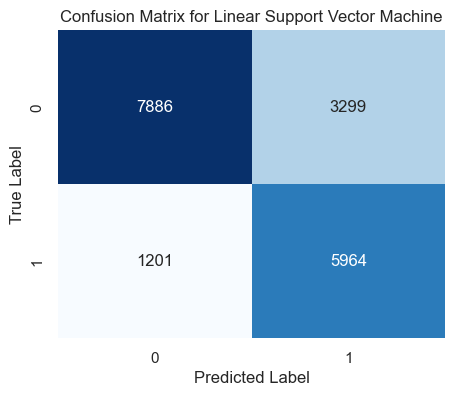

In [14]:
# confusion matrices
for name, res in results.items():
    cm = res['Confusion Matrix']
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Confusion Matrix Analysis

## Decision Tree:

- Moderate number of false positives and false negatives;
- Higher recall (is better at identifying positives than negatives);
- Many false positives suggests it mislabels negatives often (low precision).

## Random Forest:

- Very Balanced Confusion Matrix;
- Lowest false positives and low false negatives count;
- Reflects high precision and recall - overall strongest;

## K-Nearest Neighbors

- Has good true negatives but highest false negatives count (misses many positives);
- Explains its lower F1 score and recall;
- More conservative when it comes to predicting positives.

## Linear Support Vector Machine

- Lowest false negatives count, very strong at catching positives;
- Matches its highest recall score;
- High false positives contributes to lower its precision.

# ROC Curve

The ROC (Receiver Operating Characteristic) curve is a powerful tool for evaluating the performance of binary classification models.

## Axes Explained

- X-axis (False Positive Rate - FPR): Proportion of actual negatives incorrectly classified as positives

- Y-axis (True Positive Rate - TPR / Recall): Proportion of actual positives correctly classified

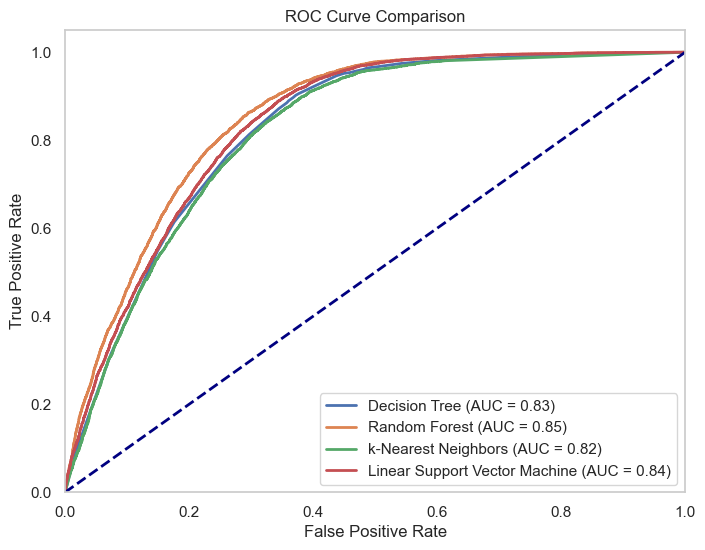

In [18]:
# ROC Curves
plt.figure(figsize=(8, 6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid()
plt.show()





## What the Curve Shows

Each curve shows the trade-off between recall (TPR) and false positives (FPR) as you vary the classification threshold.
The dashed diagonal line represents random guessing (AUC = 0.5).
The higher the curve, the better the model at distinguishing between classes.


### Model Result Comparison

| Model                  | AUC  | Interpretation |
|------------------------|------|----------------|
| Decision Tree          | 0.83 | Very good      |
| Random Forest          | 0.85 | Excellent      |
| k-Nearest Neighbors    | 0.82 | Good           |
| Linear SVM             | 0.84 | Very good      |

#### Conclusions
- All models significantly outperform random guessing.
- `Random Forest` has the highest AUC: best at distinguishing classes overall.
- `Linear SVM` also performs strongly, especially good for capturing positives (high recall).
- `Decision Tree` and `KNN` are also solid, with AUC > 0.80.


# Learning Curves and Error Plots 

- Learning Curves show the F1 Score on training and validation sets as the training set size increases.
- Error Plots show the error (1 - F1 score) for both training and validation sets.



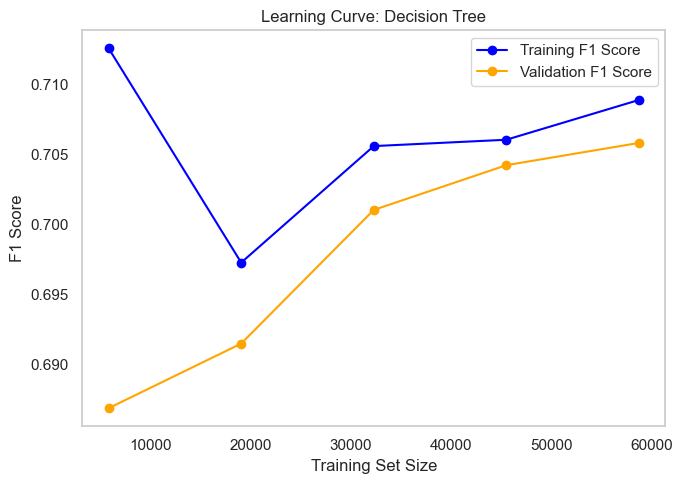

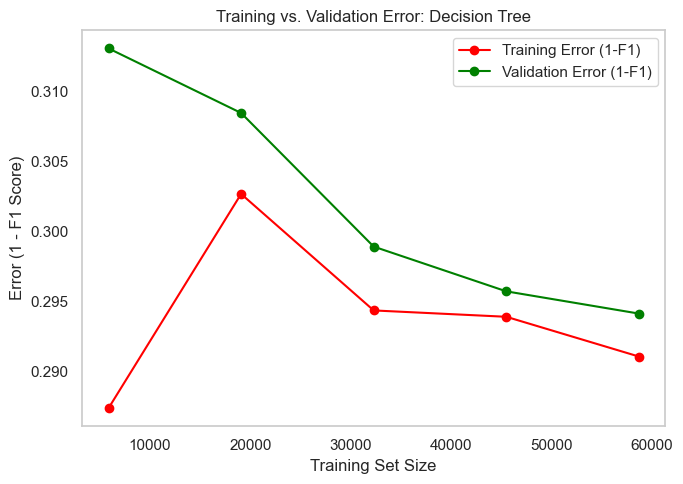

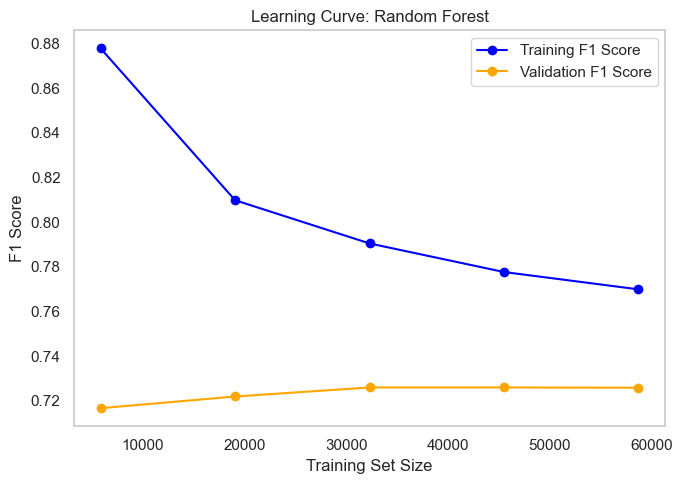

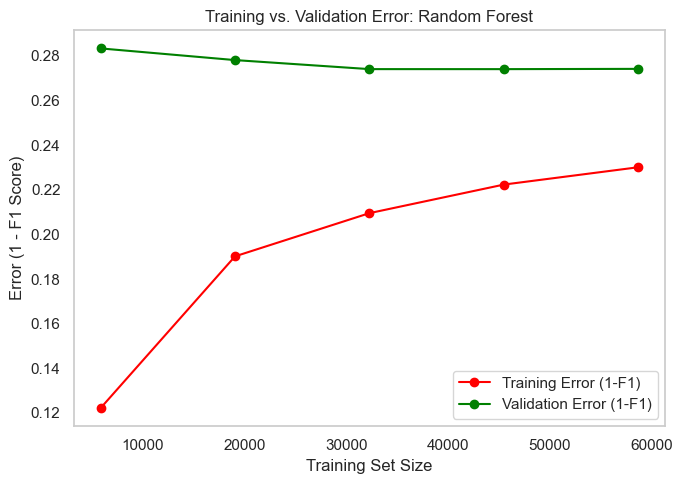

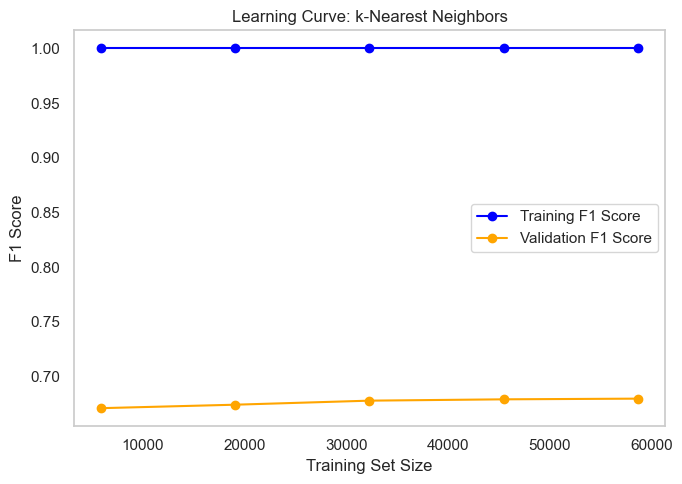

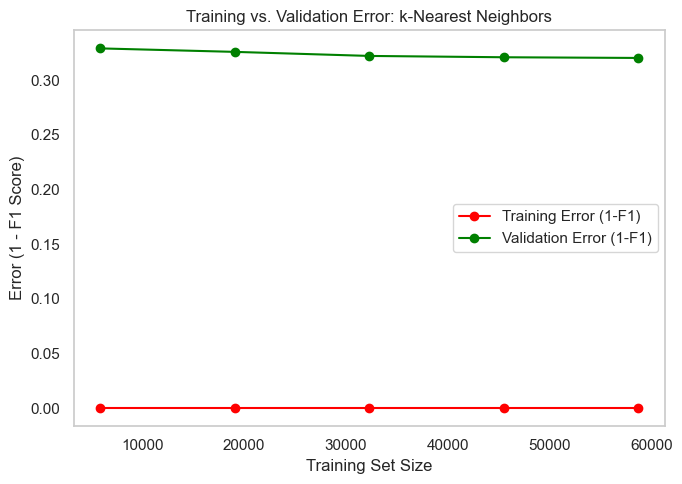

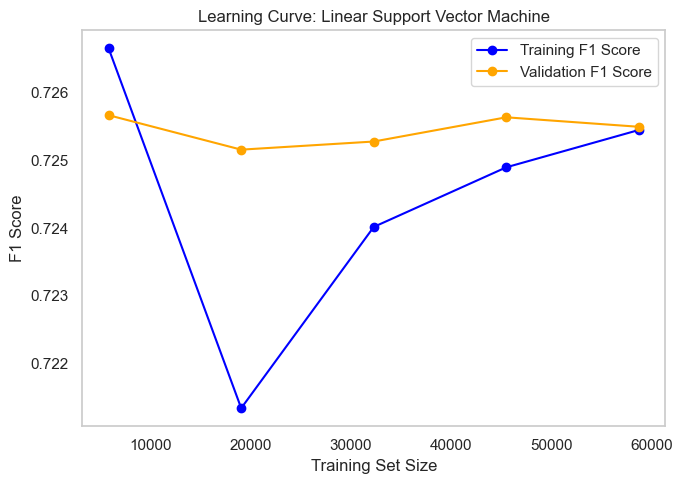

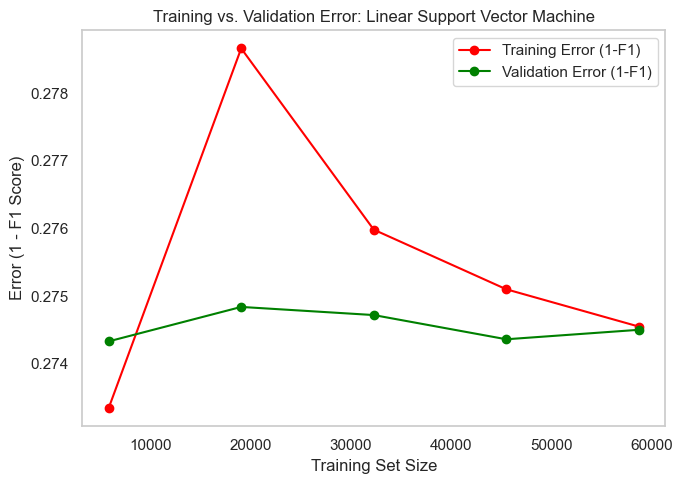

In [ ]:
# Learning Curves and Error Plots 
train_sizes = np.linspace(0.1, 1.0, 5)
for name, model in models.items():
    plt.figure(figsize=(7, 5))
    train_sizes_abs, train_scores, val_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='f1', train_sizes=train_sizes, n_jobs=-1, shuffle=True, random_state=42
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    plt.plot(train_sizes_abs, train_scores_mean, 'o-', color='blue', label='Training F1 Score')
    plt.plot(train_sizes_abs, val_scores_mean, 'o-', color='orange', label='Validation F1 Score')
    plt.title(f'Learning Curve: {name}')
    plt.xlabel('Training Set Size')
    plt.ylabel('F1 Score')
    plt.legend(loc='best')
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Error plot
    plt.figure(figsize=(7, 5))
    train_error = 1 - train_scores_mean
    val_error = 1 - val_scores_mean
    plt.plot(train_sizes_abs, train_error, 'o-', color='red', label='Training Error (1-F1)')
    plt.plot(train_sizes_abs, val_error, 'o-', color='green', label='Validation Error (1-F1)')
    plt.title(f'Training vs. Validation Error: {name}')
    plt.xlabel('Training Set Size')
    plt.ylabel('Error (1 - F1 Score)')
    plt.legend(loc='best')
    plt.grid()
    plt.tight_layout()
    plt.show()

## Decision Tree

### - Learning Curve:

- Training F1 Score starts high and decreases slightly as the training size increases;
- Validation F1 Score steadily increases with more data, indicating better generalization;
- The gap between training and validation scores narrows;
- The model benefits from more data: it generalizes better as the dataset grows;
- The learning curve suggests that the model is not underfitting, and additional data could continue improving performance slightly.

### - Training vs. Validation Error:

- Training error is consistently low and decreases slightly - the model fits the training data well;
- Validation error is higher but declines steadily, indicating the model is learning and improving;
- The error gap shrinks with more data, which again reflects less overfitting;
- Validation error reduces as training size grows, showing the model is generalizing better;
- The decreasing gap means the model is becoming more reliable;


## Random Forest: 

### - Learning Curve:

- Training F1 Score starts very high (>0.87), indicating potential overfitting early on;
- As the training size increases, the training score decreases, which is expected (model generalizes more);
- Validation F1 Score is quite flat and lower (~0.72–0.73), with very little improvement from adding more data;
- The model overfits the training data when the dataset is small;
- Even with more data, validation performance saturates, which suggests the model may need tuning or feature engineering to improve further;
- Overall generalization is stable but not significantly improving with more data.

### - Training vs. Validation Error:

- Training error increases as expected: the model fits less perfectly as data grows;
- Validation error remains almost constant, slightly decreasing then plateauing (~0.27);
- A persistent gap between the training and validation error indicates overfitting;
- The gap suggests the model learns the training data too well but doesn't generalize much better.


## K-Nearest Neighbours: 

### - Learning Curve:
- Training F1 Score is constant at 1.0: the model memorizes training data perfectly;
- Validation F1 Score is flat and significantly lower (~0.68);
- No significant improvement with more data: validation performance stays the same;
- KNN is a lazy learner: it stores the entire training set, which explains the perfect training performance;
- It does not generalize well, and more data does not help much in this case.

### - Training vs. Validation Error:

- Training error is flat at 0% (perfect classification);
- Validation error is flat around 32%, which is quite high, and does not decrease with more data;
- Large and constant gap between training and validation error;
- KNN is overfitting hard: perfect on training, weak on validation;
- Model does not improve with more data.
´

## Linear Support Vector Machine: 

### - Learning Curve:

- Training F1 Score is stable with a slight dip at smaller sizes, then increases gradually;
- Validation F1 Score is very stable and close to the training score;
- The curves are very close together: good generalization;
- The model is well regularized, with low overfitting;
- Adding more data brings a slight improvement in training F1 but has minimal impact on validation F1;
- The behavior is consistent and reliable.

### - Training vs. Validation Error:

- Training error is slightly higher than validation at some points;
- Validation error is very stable, indicating robust generalization;
- The error gap is minimal throughout the learning curve;
- The model is well-balanced and performs consistently regardless of training set size;
- Additional data might not help significantly.


#### Comparison between Models: 
| Model               | Overfitting | Validation F1 Trend | Error Gap (Train vs. Val) | Generalization | Notes |
|--------------------|-------------|----------------------|----------------------------|----------------|-------|
| **Decision Tree**  | Moderate    | Improves with more data | Shrinks with more data     | Acceptable     | Generalization improves with size; still benefits from more data |
| **Random Forest**  | High        | Flat                  | Persistent and large       | Limited        | Excellent on train set, weak improvement on validation; tuning needed |
| **K-Nearest Neighbors** | Very High   | Flat                  | Very large and constant     | Poor           | Memorizes training data perfectly, poor validation performance |
| **Linear SVM**     | Low         | Flat and stable       | Very small                 | Very Good      | Best balance; well regularized and stable across sizes |

# Final Predictions Using The Best Models on test.csv

The best models (Random Forest and LinearSVC) were used to predict smokers on `test.csv`.  
Predictions were saved to CSV files and compared:

- Predictions were generated after applying the same preprocessing and scaling as the training data.
- Three output files were created:
  - `final_test_predictions_rf.csv`
  - `final_test_predictions_svm.csv`
  - `test_predictions_comparison.csv`

A bar chart shows the prediction distribution, and a heatmap highlights the agreement between both models.

Prediction distribution on test.csv (count and percentage):
    Random Forest             SVM
0  54061 (50.92%)  47931 (45.15%)
1  52110 (49.08%)  58240 (54.85%)


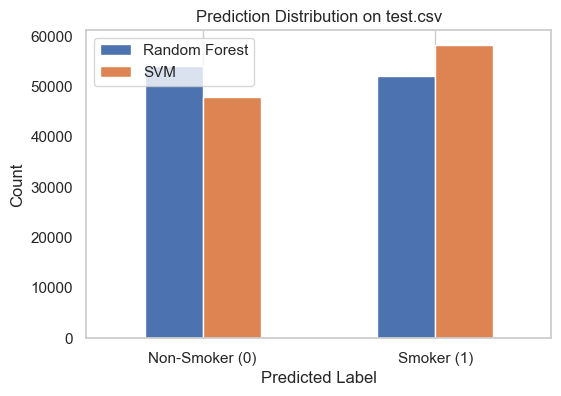

Agreement rate between Random Forest and SVM on test.csv: 88.62%


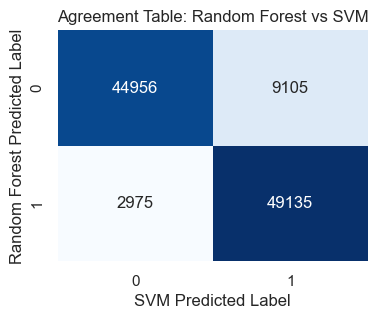

In [20]:
# Load test.csv
test_df = pd.read_csv('./original/test.csv')
test_ids = test_df['id'].reset_index(drop=True)

# Drop the same irrelevant features as in train
test_df = test_df.drop(columns=final_irrelevant_features, errors='ignore')
test_df = test_df.drop(columns=['id'], errors='ignore')

# Apply the same scaler as for train
X_test_final = scaler.transform(test_df)

# Predict with Random Forest and SVM
rf_pred = rf_grid.best_estimator_.predict(X_test_final)
svm_pred = svc_grid.best_estimator_.predict(X_test_final)

# Random Forest
rf_submission = pd.DataFrame({
    'id': test_ids,
    'Predicted Label': rf_pred
})
rf_submission.to_csv('original/test_predictions/final_test_predictions_rf.csv', index=False)

# SVM
svm_submission = pd.DataFrame({
    'id': test_ids,
    'Predicted Label': svm_pred
})
svm_submission.to_csv('original/test_predictions/final_test_predictions_svm.csv', index=False)

# Comparison table 
comparison_df = pd.DataFrame({
    'id': test_ids,
    'RandomForest_Pred': rf_pred,
    'SVM_Pred': svm_pred
})
comparison_df.to_csv('original/test_predictions/test_predictions_comparison.csv', index=False)

# --- ANALYSIS: Prediction Distribution and Agreement ---

# Table: prediction counts and percentages
rf_counts = pd.Series(rf_pred).value_counts().sort_index()
svm_counts = pd.Series(svm_pred).value_counts().sort_index()
pred_dist = pd.DataFrame({'Random Forest': rf_counts, 'SVM': svm_counts}).fillna(0).astype(int)
total = len(test_ids)
pred_percent = pred_dist.apply(lambda x: (x / total * 100).round(2)).astype(str) + '%'
pred_dist_with_percent = pred_dist.astype(str) + ' (' + pred_percent + ')'
print("Prediction distribution on test.csv (count and percentage):")
print(pred_dist_with_percent)

# Bar plot
pred_dist.plot(kind='bar', figsize=(6,4))
plt.title('Prediction Distribution on test.csv')
plt.xlabel('Predicted Label')
plt.ylabel('Count')
plt.xticks([0,1], ['Non-Smoker (0)', 'Smoker (1)'], rotation=0)
plt.grid(axis='y')
plt.show()

# Agreement analysis
agreement = (rf_pred == svm_pred)
agreement_rate = agreement.mean()
print(f"Agreement rate between Random Forest and SVM on test.csv: {agreement_rate:.2%}")

# Table of agreement/disagreement (as a heatmap)
agreement_table = pd.crosstab(rf_pred, svm_pred, rownames=['Random Forest'], colnames=['SVM'])

plt.figure(figsize=(4,3))
sns.heatmap(agreement_table, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Agreement Table: Random Forest vs SVM')
plt.xlabel('SVM Predicted Label')
plt.ylabel('Random Forest Predicted Label')
plt.show()
